<h1>Chapter 2 | Data Exercise #5 | <code>football</code>: Data Preparation</h1>

<p>5. Consider the <code>football</code> dataset.</p>
<p>Assignments:</p>
<ul>
    <li>Create a table counting the number of seasons each team spent in the Premier League.</li>
    <li>List the teams that featured in all 11 seasons.</li>
    <li>List the teams that were in the League for one season.</li>
</ul>
<h2><b>1.</b> Load the data</h2>

In [69]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [56]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/football/clean/"
data_out = f"{dirname}da_data_exercises/ch02-preparing_data_for_analysis/data"
output = f"{dirname}da_data_exercises/ch02-preparing_data_for_analysis/data/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [57]:
epl_games = pd.read_csv(f"{data_in}epl_games.csv")

In [58]:
epl_games.sort_values(["season", "team_home"])

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
0,E0,2008,16aug2008,Arsenal,West Brom,3,0,1,0
21,E0,2008,30aug2008,Arsenal,Newcastle,3,0,3,0
53,E0,2008,27sep2008,Arsenal,Hull,0,3,1,2
75,E0,2008,18oct2008,Arsenal,Everton,3,0,3,1
95,E0,2008,29oct2008,Arsenal,Tottenham,1,1,4,4
...,...,...,...,...,...,...,...,...,...
4085,E0,2018,02mar2019,Wolves,Cardiff,3,0,2,0
4115,E0,2018,02apr2019,Wolves,Man United,3,0,2,1
4139,E0,2018,20apr2019,Wolves,Brighton,1,1,0,0
4148,E0,2018,24apr2019,Wolves,Arsenal,3,0,3,1


<h2><b>#1.</b> Create a table counting the number of seasons each team spent in the Premier League.</h2>

In [59]:
epl_games["div"].describe()

count     4180
unique       1
top         E0
freq      4180
Name: div, dtype: object

<p>We know that the number of seasons can be reached by aggregating the data according to the <code>season</code> feature.</p>

In [60]:
len(epl_games["season"].unique())

11

<p>We have 11 different seasons in our dataset. Now, we need to count how many seasons each teeam spent in the Premier League. To do this, we need to look at <code>team_home</code> or <code>team_away</code>. As long as a team is in one of them, we know that it made part of that given season. Our reasoning should thus be:</p>
<ul><li>If <code>team_home</code> is in <code>season</code>, count as 1; if not, count as 0</code>

In [61]:
season_counts = epl_games.groupby(by="team_home").apply(lambda x: x["season"].nunique()).sort_values(ascending=False)

In [62]:
season_counts

team_home
Arsenal           11
Chelsea           11
Tottenham         11
Man United        11
Liverpool         11
Everton           11
Man City          11
West Ham          10
Stoke             10
Newcastle          9
West Brom          9
Sunderland         9
Aston Villa        8
Southampton        7
Fulham             7
Swansea            7
Crystal Palace     6
Wigan              5
Hull               5
Leicester          5
Burnley            5
Watford            4
Wolves             4
Norwich            4
Blackburn          4
Bolton             4
Bournemouth        4
QPR                3
Portsmouth         2
Middlesbrough      2
Birmingham         2
Huddersfield       2
Cardiff            2
Brighton           2
Reading            1
Blackpool          1
dtype: int64

In [63]:
season_table = pd.DataFrame(
        {"team": season_counts.index,
         "seasons": season_counts.values,
         },
    )

In [64]:
season_table

,team,seasons
0,Arsenal,11
1,Chelsea,11
2,Tottenham,11
3,Man United,11
4,Liverpool,11
5,Everton,11
6,Man City,11
7,West Ham,10
8,Stoke,10
9,Newcastle,9


<Figure size 1000x1200 with 0 Axes>

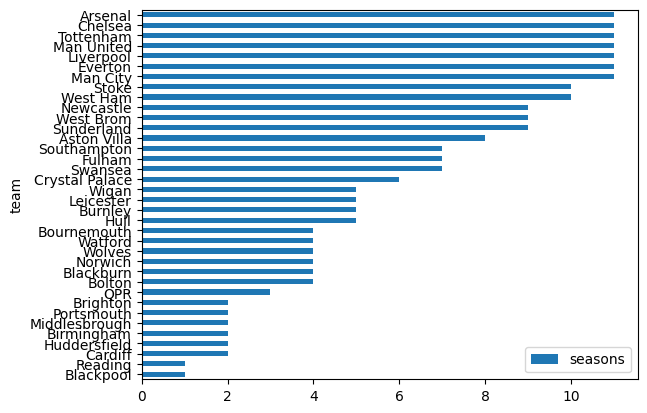

In [65]:
plt.figure(figsize=(10, 12))
season_table.sort_values(by="seasons", ascending=True).plot(kind='barh', x="team")
plt.show()

<h2><b>#2.</b> List the teams that featured in all 11 seasons</h2>

In [66]:
season_table.head(10)

,team,seasons
0,Arsenal,11
1,Chelsea,11
2,Tottenham,11
3,Man United,11
4,Liverpool,11
5,Everton,11
6,Man City,11
7,West Ham,10
8,Stoke,10
9,Newcastle,9


<p>We already know the teams that featured in all 11 seasons by looking at the table above. Let's make a list containing only those teams:</p>

In [67]:
season_table["team"][season_table["seasons"] == 11]

0       Arsenal
1       Chelsea
2     Tottenham
3    Man United
4     Liverpool
5       Everton
6      Man City
Name: team, dtype: object

<h2><b>#3.</b> List the teams that were in the League for one season</h2>
<p>We can use the procedure above to keep only the teams that make part of one season only:</p>

In [68]:
season_table["team"][season_table["seasons"] == 1]

34      Reading
35    Blackpool
Name: team, dtype: object

<p>As an extra assignment, we can plot a bar chart to visualize these results.</p>

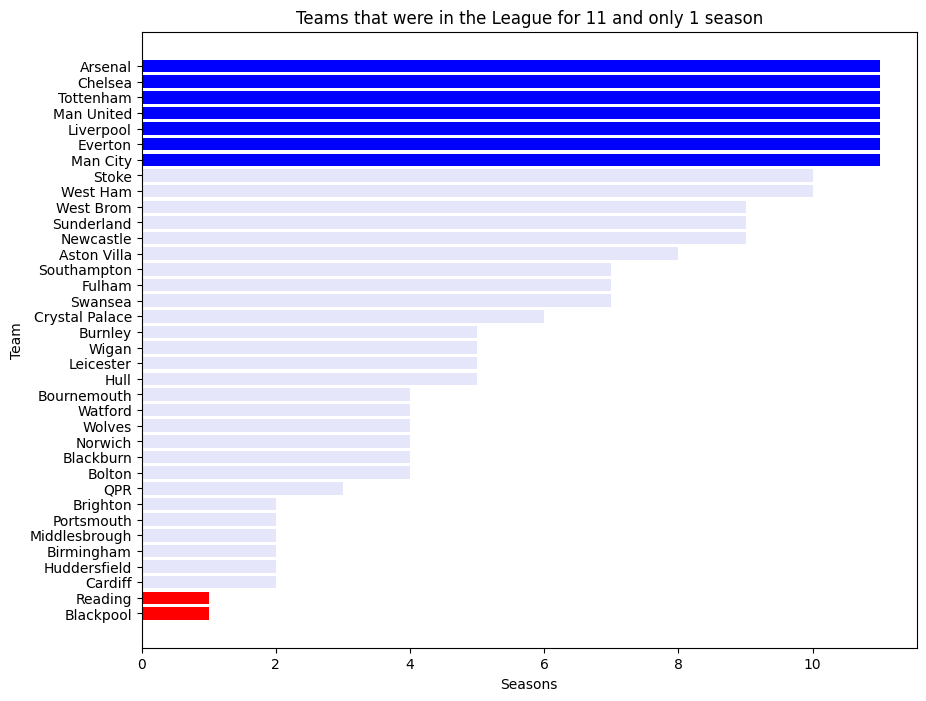

In [77]:
season_table = season_table.sort_values(by="seasons", ascending=True)
colors = np.where(
    season_table["seasons"] == 11, "blue", np.where(season_table["seasons"] == 1, "red", "lavender"))

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(season_table["team"], season_table["seasons"], color=colors)

ax.set_title("Teams that were in the League for 11 and only 1 season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Team")

plt.show()

<p>And that's it for our assignment!</p>
<hr>